In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colormaps as cm
from sklearn.decomposition import PCA

In [52]:
# read weights from file weights.npy
weights = np.load('weights_contextual.npy') # weights = np.random.rand(64,100) # randomize weights
actions = np.load('actions_contextual.npy').T

n_epochs, n_times, n_weights = weights.shape

In [56]:
# concat for i in n_epochs, append times x weights
weights_new = np.empty((n_weights, n_times*n_epochs)) 
for i in range(n_epochs):
    for j in range(n_times):
        weights_new[:,i*j] = weights[i,j,:]

actions_new = np.empty((2,2000))
for i in range(n_epochs):
    for j in range(n_times):
        actions_new[:,i*j] = actions[:,j,i]


In [47]:
weights_new.shape

(64, 2000)

In [59]:
# weights = weights.reshape(-1,n_weights).T
# actions = actions.reshape(-1,n_times*n_epochs)

In [62]:
weights = weights_new
actions = actions_new

In [63]:
# Step 2: Run PCA using sklearn
pca = PCA(n_components=2)
pca_result = pca.fit_transform(weights_new.T).T

KeyboardInterrupt: 

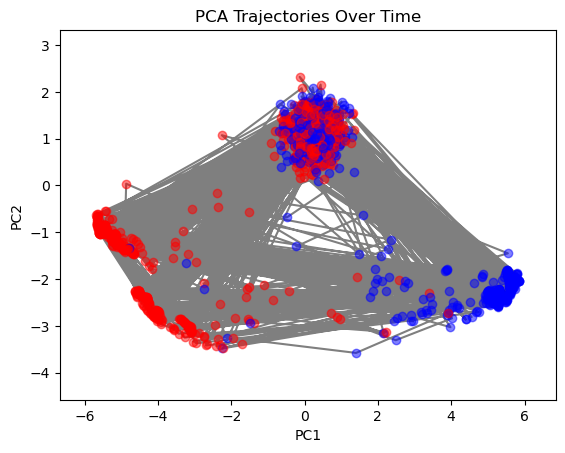

In [67]:
# Step 3: Plot and create an animation of the PCA trajectories over time
fig, ax = plt.subplots()
line, = ax.plot([], [], '-')
marker, = ax.plot([], [], 'o')

line.set_alpha(0.5)
line.set_color('black')

marker.set_alpha(0.5)

# Set up the plot limits
ax.set_xlim(np.min(pca_result[0]) - 1, np.max(pca_result[0]) + 1)
ax.set_ylim(np.min(pca_result[1]) - 1, np.max(pca_result[1]) + 1)
ax.set_title('PCA Trajectories Over Time')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

colors = []
markers = []
def init():
    line.set_data([], [])
    marker.set_data([], [])
    
    return line,

def update(frame):
    line.set_data(pca_result[0][:frame+1], pca_result[1][:frame+1])

    # Determine the color based on the action at this frame
    if actions[0, frame] == 0:  # red
        current_color = 'red'
    elif actions[0, frame] == 1:  # blue
        current_color = 'blue'
    else:
        current_color = 'black'  # default to black or any other color if not 0 or 1

    # Append the current color to the list of colors
    colors.append(current_color)
    
    # Set the marker color for all points up to the current frame
    marker, = ax.plot(pca_result[0][frame], pca_result[1][frame], 'o', color=current_color, alpha=0.5)
    markers.append(marker)
    
    return line, *markers

ani = animation.FuncAnimation(fig, update, frames=n_times*n_epochs, init_func=init, blit=True, repeat=False)

# To save the animation as a video file (e.g., MP4), uncomment the following lines
ani.save('pca_trajectories_contextual.mp4', writer='ffmpeg', fps=2)

# Show the animation
plt.show()

KeyboardInterrupt: 

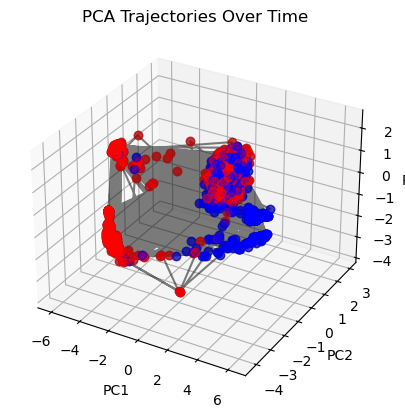

In [68]:
# Step 2: Run PCA using sklearn with 3 components
pca3 = PCA(n_components=3)
pca_result3 = pca3.fit_transform(weights.T).T

# Step 3: Plot and create an animation of the PCA trajectories over time in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
line, = ax.plot([], [], [], 'o-')

# Set up the plot limits
ax.set_xlim(np.min(pca_result3[0]) - 1, np.max(pca_result3[0]) + 1)
ax.set_ylim(np.min(pca_result3[1]) - 1, np.max(pca_result3[1]) + 1)
ax.set_zlim(np.min(pca_result3[2]) - 1, np.max(pca_result3[2]) + 1)
ax.set_title('PCA Trajectories Over Time')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

markers = []
def init():
    marker.set_data([], [])
    line.set_data([], [])
    line.set_alpha(0.5)
    line.set_color('black')
    line.set_3d_properties([])
    return line, marker

def update(frame):
    line.set_data(pca_result3[0][:frame+1], pca_result3[1][:frame+1])
    line.set_3d_properties(pca_result3[2][:frame+1])
    
    # Determine the color based on the action at this frame
    if actions[0, frame] == 0:  # red
        current_color = 'red'
    elif actions[0, frame] == 1:  # blue
        current_color = 'blue'
    else:
        current_color = 'black'  # default to black or any other color if not 0 or 1

    # Plot the marker for the current frame
    marker, = ax.plot([pca_result3[0][frame]], [pca_result3[1][frame]], [pca_result3[2][frame]], 'o', color=current_color, alpha=.5)
    markers.append(marker)
    
    return line, *markers

ani3 = animation.FuncAnimation(fig, update, frames=n_times*n_epochs, init_func=init, blit=True, repeat=False)

# To save the animation as a video file (e.g., MP4), uncomment the following lines
ani3.save('pca_trajectories_3d.mp4', writer='ffmpeg', fps=10)

# Show the animation
plt.show()